###### 1.Work on this dataset ,bringing out all the useful insight and information
###### 2.Build a model for this data set, The accuracy score should not be less than 96%

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [228]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<AxesSubplot:>

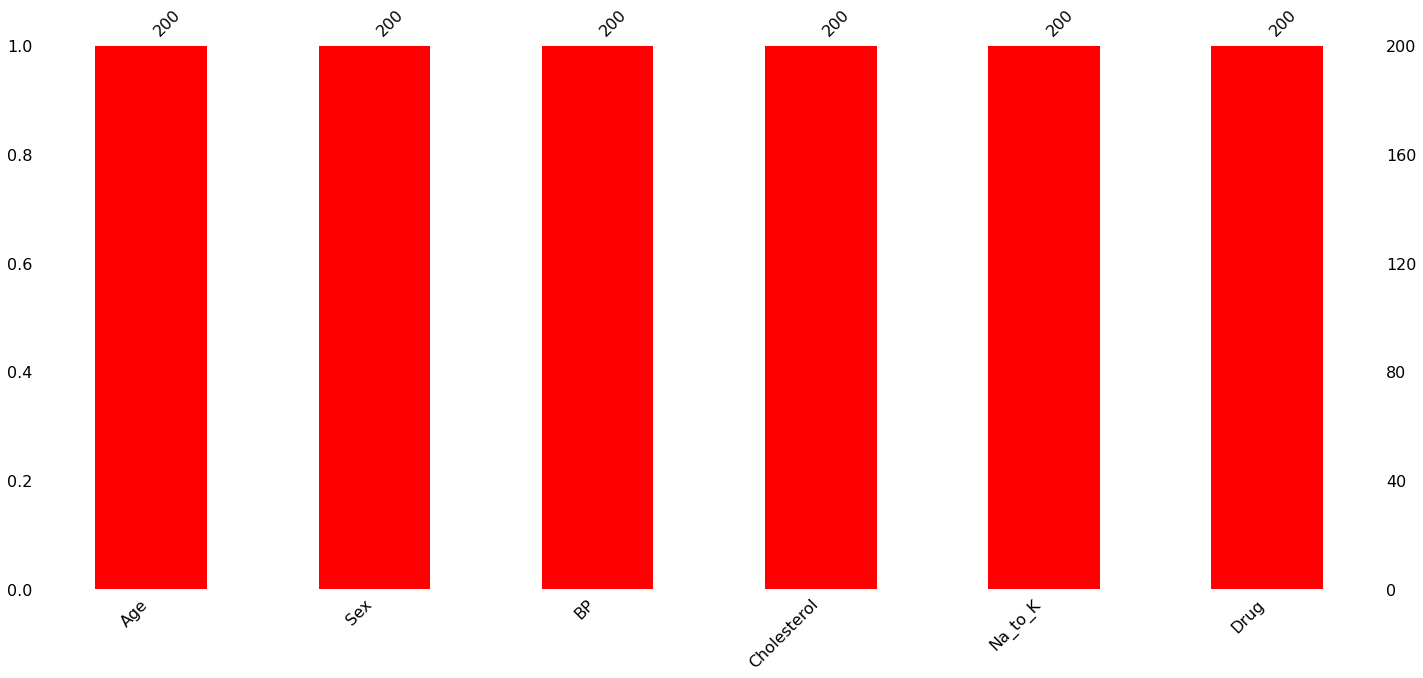

In [229]:
mns.bar(df,color = 'red')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [231]:
df.shape

(200, 6)

In [232]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [233]:
cat_veriable = ['Sex', 'BP', 'Cholesterol', 'Drug']
enc =LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])

In [234]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [235]:
X = df.drop('Drug',axis=1)
y = df['Drug']

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [237]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [238]:
pred1 = model1.predict(X_test)
pred1

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 4, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 4,
       2, 0, 4, 4, 0, 2])

In [239]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50



AxesSubplot(0.125,0.125;0.62x0.755)


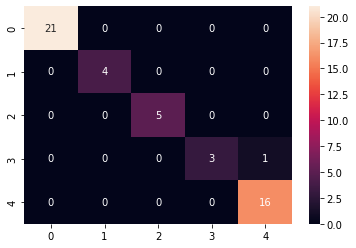

In [240]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))